* Patrick Woods 
* UID: 113520266 
* Project 3

In [2]:
#Maintain imports for all problems here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
import seaborn as sns

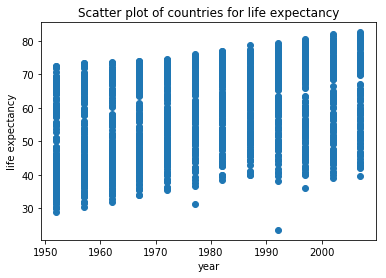

In [3]:
#Exercise 1
data = pd.read_csv("https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv", sep='\t')
plt.scatter(data['year'], data['lifeExp'])
plt.xlabel('year')
plt.ylabel('life expectancy')
plt.title('Scatter plot of countries for life expectancy')
plt.show()

Question 1: There does seem to be a general increasing trend for the plot, and the trend also seems to be linear.

Question 2: For most of the years, I'd argue that the distribution is skewed and not centered about the center. Also, while the first half of the years do not seem unimodal, the later half of the years do appear to be unimodal.

Question 3: Personally, yes, I'd reject the null of no relationship.

Question 4: Hopefully, the violin plot distributions would not flow up (or down) like they do for the example above at question one. The linear regression model would be accurate, leading to a nice flow of unimodal distribution of residuals across years.

Question 5: We may see a fanning effect of residuals due to the large variations of life expectancies for a given year. Thus, or violin plot may start relatively normal and focused around zero, and then spread out to a different values as the years progress.

Text(0.5, 1.0, 'Linear Regression over scatter plot of life expectancy for countries')

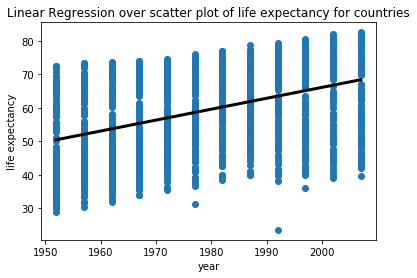

In [4]:
#Exercise 2
reg = lm.LinearRegression()
reg.fit(X=np.array(data['year']).reshape(-1,1),y=np.array(data['lifeExp']))
reg_line=reg.predict(np.array(data['year'].unique()).reshape(-1,1))
plt.scatter(data['year'], data['lifeExp'])
plt.plot(np.array(data['year'].unique()), reg_line, color='black', linewidth=3)
plt.xlabel('year')
plt.ylabel('life expectancy')
plt.title('Linear Regression over scatter plot of life expectancy for countries')

In [5]:
results = smf.ols('lifeExp ~ year', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           7.55e-80
Time:                        15:18:09   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

Question 6:

In [6]:
print('The average change in life expectancy in years, per year is: ')
print(((results.params[1] * 1957 + results.params[0])-(results.params[1] * 1952 + results.params[0])) / 5)

The average change in life expectancy in years, per year is: 
0.3259038276371484


Question 7: I reject the null hypothesis of no relation due to the p-value being essentially 0. This implies high significance between the dependent and independent variables.

Text(0.5, 1.0, "Residuals of countries' life expectancies over years")

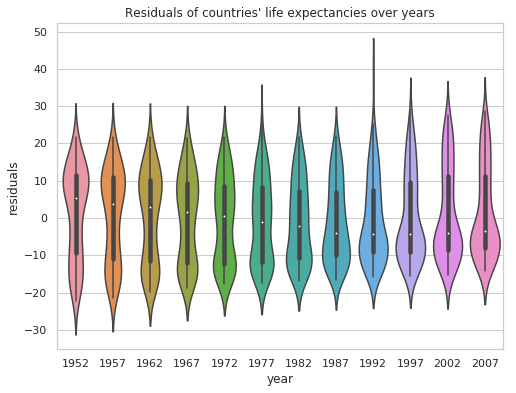

In [8]:
#Exercise 3
resid_list = list()
for year, exp in list(zip(data['year'], data['lifeExp'])):
    if year==data['year'].unique()[0]:
        resid_list.append(reg_line[0]-exp)
    elif year==data['year'].unique()[1]:
        resid_list.append(reg_line[1]-exp)
    elif year==data['year'].unique()[2]:
        resid_list.append(reg_line[2]-exp)
    elif year==data['year'].unique()[3]:
        resid_list.append(reg_line[3]-exp)
    elif year==data['year'].unique()[4]:
        resid_list.append(reg_line[4]-exp)
    elif year==data['year'].unique()[5]:
        resid_list.append(reg_line[5]-exp)
    elif year==data['year'].unique()[6]:
        resid_list.append(reg_line[6]-exp)
    elif year==data['year'].unique()[7]:
        resid_list.append(reg_line[7]-exp)
    elif year==data['year'].unique()[8]:
        resid_list.append(reg_line[8]-exp)
    elif year==data['year'].unique()[9]:
        resid_list.append(reg_line[9]-exp)
    elif year==data['year'].unique()[10]:
        resid_list.append(reg_line[10]-exp)
    else:
        resid_list.append(reg_line[11]-exp)

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style="whitegrid")
ax = sns.violinplot(x=np.array(data['year']), y=np.array(resid_list))
ax.set_xlabel('year')
ax.set_ylabel('residuals')
ax.set_title('Residuals of countries\' life expectancies over years')

Question 8: The plot does not completely match my expectations in question 4, as it sports some multimodal distributions. However, the residuals are mostly centered around 0.

Text(0, 0.5, 'residuals')

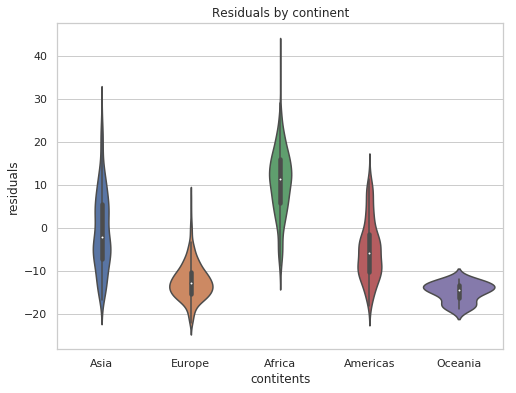

In [9]:
#Exercise 4
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x=np.array(data['continent']), y=np.array(resid_list))
ax.set_title('Residuals by continent')
ax.set_xlabel('contitents')
ax.set_ylabel('residuals')

Question 9: There is a strong dependence between residuals and continents, suggesting that this information should be accounted for when performing the linear regression.

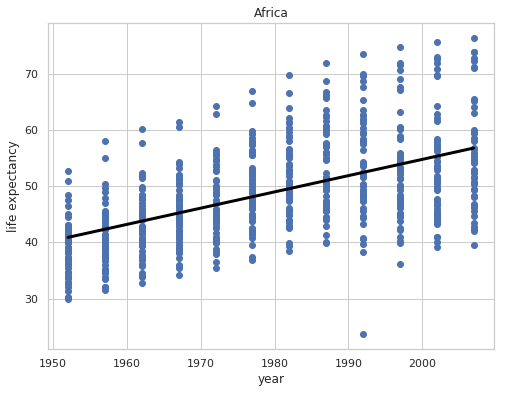

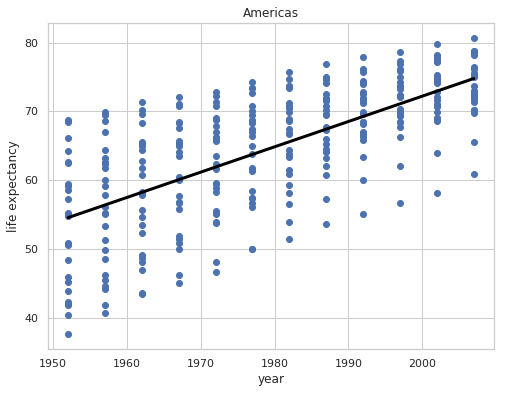

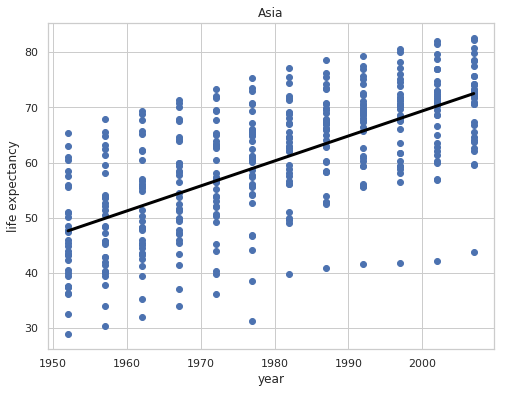

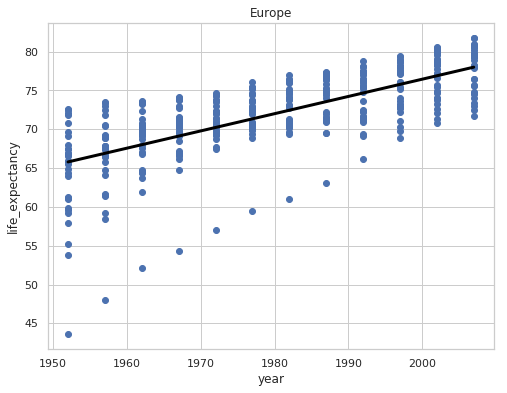

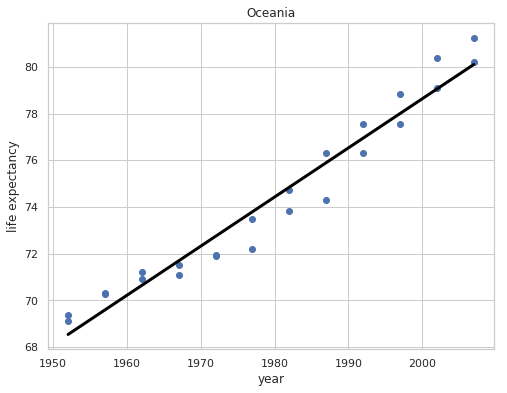

In [10]:
#Exercise 5
#setup the 5 graphs
fig, ax = plt.subplots(figsize=(8,6))
fig2, ax2 = plt.subplots(figsize=(8,6))
fig3, ax3 = plt.subplots(figsize=(8,6))
fig4, ax4 = plt.subplots(figsize=(8,6))
fig5, ax5 = plt.subplots(figsize=(8,6))
ax.set_xlabel('year')
ax.set_ylabel('life expectancy')
ax2.set_xlabel('year')
ax2.set_ylabel('life expectancy')
ax3.set_xlabel('year')
ax3.set_ylabel('life expectancy')
ax4.set_xlabel('year')
ax4.set_ylabel('life_expectancy')
ax5.set_xlabel('year')
ax5.set_ylabel('life expectancy')
counter = 0
bins = data.groupby(['continent'])

for key, group in bins:
    if counter == 0:
        ax.set_title(key)
        ax.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    elif counter == 1:
        ax2.set_title(key)
        ax2.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax2.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    elif counter == 2:
        ax3.set_title(key)
        ax3.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax3.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    elif counter == 3:
        ax4.set_title(key)
        ax4.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax4.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    else:
        ax5.set_title(key)
        ax5.scatter(group['year'], group['lifeExp'])
        reg.fit(X=np.array(group['year']).reshape(-1,1),y=np.array(group['lifeExp']))
        reg_line=reg.predict(np.array(group['year'].unique()).reshape(-1,1))
        ax5.plot(np.array(group['year'].unique()), reg_line, color='black', linewidth=3)
    counter += 1

Question 10: Absolutely, the regression lines for each continent maintain a strong enough difference between each other. Not only do they start at different values, but they feature different slopes.

In [11]:
#Exercise 6 (based on the clarification on Piazza post @123):
results2 = smf.ols('lifeExp ~ year * continent', data=data).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:19:26   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Question 11: The intercepts are significantly different from zero, however the slopes are closely grouped around 0.

Question 12

In [12]:
print('The average change in life expectancy in years, per year in Africa is: ')
print(((results2.params[5] * 1957 + results2.params[0])-(results2.params[5] * 1952 + results2.params[0])) / 5)
print('The average change in life expectancy in years, per year in the Americas is: ')
print(((results2.params[6] * 1957 + results2.params[1])-(results2.params[6] * 1952 + results2.params[1])) / 5)
print('The average change in life expectancy in years, per year in Asia is: ')
print(((results2.params[7] * 1957 + results2.params[2])-(results2.params[7] * 1952 + results2.params[2])) / 5)
print('The average change in life expectancy in years, per year in Europe is: ')
print(((results2.params[8] * 1957 + results2.params[3])-(results2.params[8] * 1952 + results2.params[3])) / 5)
print('The average change in life expectancy in years, per year in Oceania is: ')
print(((results2.params[9] * 1957 + results2.params[4])-(results2.params[9] * 1952 + results2.params[4])) / 5)

The average change in life expectancy in years, per year in Africa is: 
0.28952926304618815
The average change in life expectancy in years, per year in the Americas is: 
0.0781216740184277
The average change in life expectancy in years, per year in Asia is: 
0.1635931408544252
The average change in life expectancy in years, per year in Europe is: 
-0.06759711852245118
The average change in life expectancy in years, per year in Oceania is: 
-0.07925688542218837


In [13]:
#Exercise 7
if results.fvalue > results2.fvalue:
    print('The interaction model is not significantly better than the original model')
elif results2.fvalue > results.fvalue:
    print('The interaction model is better than the original model')
else:
    print('non-determinate')

The interaction model is better than the original model


Question 13: While the F-value is higher for the interaction model, I'm not convinced that its 'significantly' better than the original model. Some of the slopes are negative for certain continents, which I believe would cause the predictions for those continents to be misleading.

Text(0, 0.5, 'residuals')

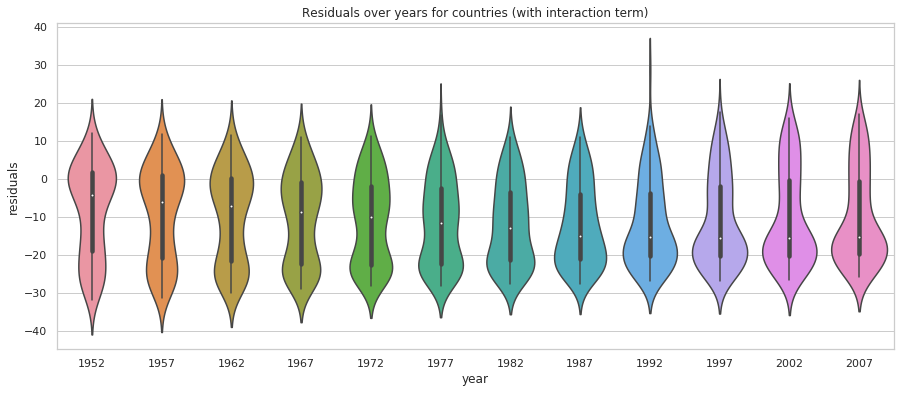

In [14]:
#Exercise 8, interaction model, non-grouped
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
resid_list = list()

for year, exp in list(zip(data['year'], data['lifeExp'])):    
    resid_list.append(((year * results2.params[5]) + results2.params[0])-exp)

ax = sns.violinplot(x=np.array(data['year']), y=np.array(resid_list))
ax.set_title('Residuals over years for countries (with interaction term)')
ax.set_xlabel('year')
ax.set_ylabel('residuals')

Text(0, 0.5, 'residuals')

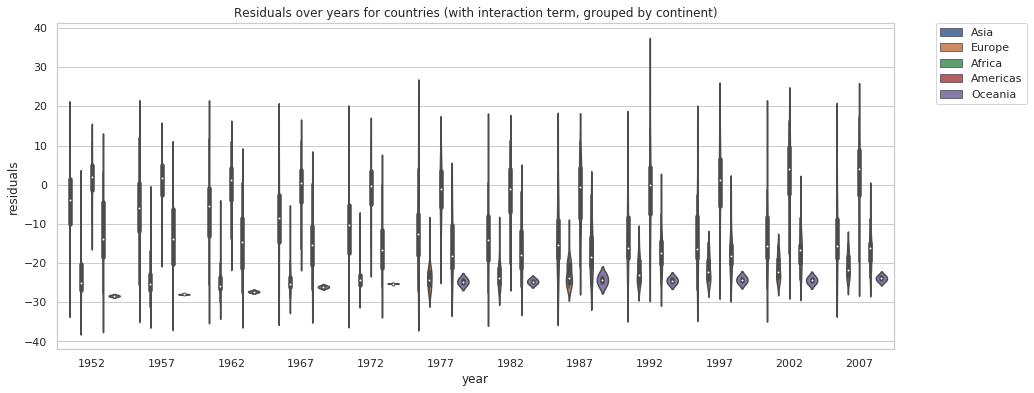

In [15]:
#Interaction model, grouped
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.violinplot(x=np.array(data['year']), y=np.array(resid_list), data=data, hue='continent')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Residuals over years for countries (with interaction term, grouped by continent)')
ax.set_xlabel('year')
ax.set_ylabel('residuals')

Text(0, 0.5, 'residuals')

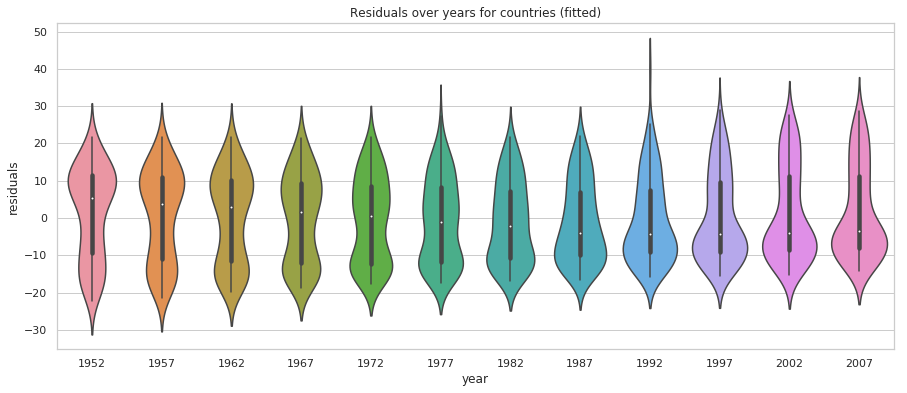

In [16]:
#Fitted model, non-grouped
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
resid_list = list()

for year, exp in list(zip(data['year'], data['lifeExp'])):    
    resid_list.append(((year * results.params[1]) + results.params[0])-exp)

ax = sns.violinplot(x=np.array(data['year']), y=np.array(resid_list))
ax.set_title('Residuals over years for countries (fitted)')
ax.set_xlabel('year')
ax.set_ylabel('residuals')

Text(0, 0.5, 'residuals')

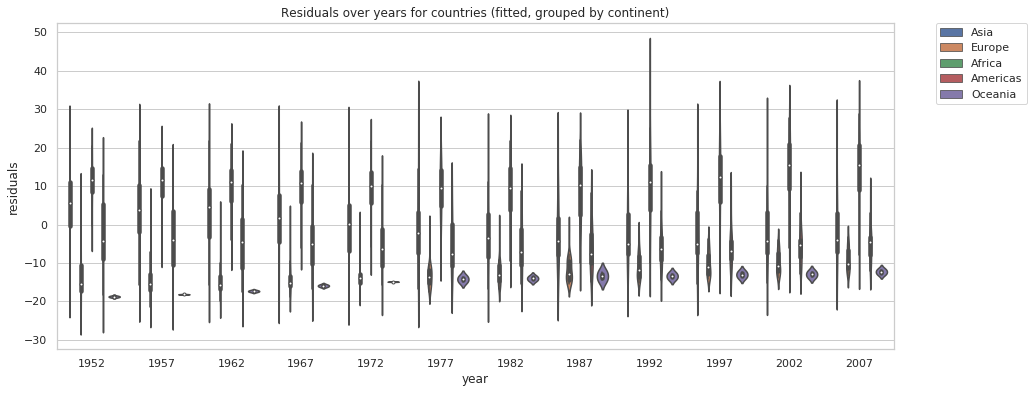

In [17]:
#Fitted model, grouped
fig, ax = plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.violinplot(x=np.array(data['year']), y=np.array(resid_list), data=data, hue='continent')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Residuals over years for countries (fitted, grouped by continent)')
ax.set_xlabel('year')
ax.set_ylabel('residuals')

Exercise 8 comments: Based on these 2 graphs, I'm led to believe that the original model is more effective. The residuals for the iteraction term clearly show that the regression is under estimating life expectancy for the later years. Perhaps the trend is more of a quadratic curve, as opposed to linear. Also, both models seems largely ineffective at predicting life expectancies for Oceania and Europe. I find this especially strange as the linear regression for Oceania in exercise 5 is very clean. I'm thinking that maybe because there isn't as much data as the other continents, the model had a hard time training.